   # <center> Mini Project - "Forest Fires" </center>

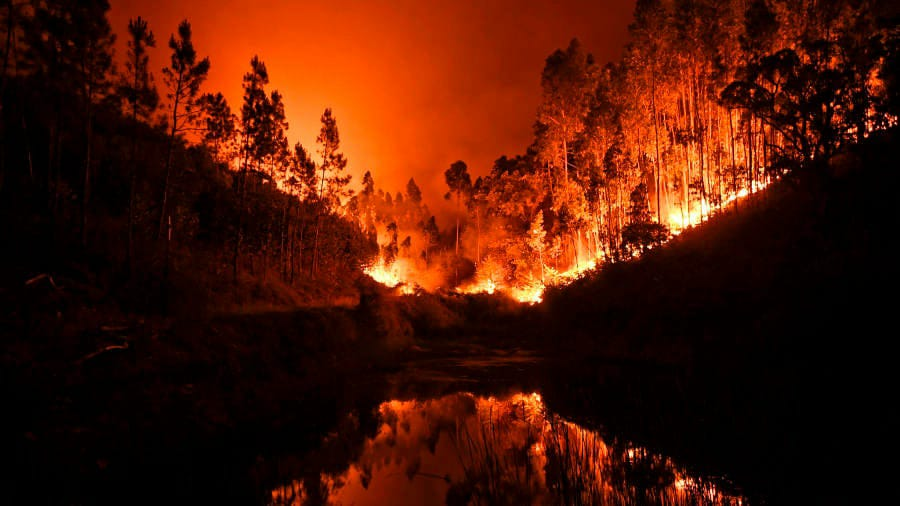

### Forest fires help in the natural cycle of woods' growth and replenishment. But when fires burn too hot and uncontrollable, they can be damaging and life threatening. The following is an analysis of forest fires in an undisclosed location and the factors that govern them.

### Dataset Information:

X - x-axis spatial coordinate within an area: 1 to 9

Y - y-axis spatial coordinate within within an area: 2 to 9

month - Month of the year: 'jan' to 'dec'

day - Day of the week: 'mon' to 'sun'

FFMC - Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20

DMC - Duff Moisture Code index from the FWI system: 1.1 to 291.3

DC - Drought Code index from the FWI system: 7.9 to 860.6

ISI - Initial Spread Index from the FWI system: 0.0 to 56.10

temp - Temperature in Celsius degrees: 2.2 to 33.30

RH - Relative humidity in %: 15.0 to 100

wind - Wind speed in km/h: 0.40 to 9.40

rain - Outside rain in mm/m2 : 0.0 to 6.4

area - The burned area of the forest (in hectares): 0.00 to 1090.84

### Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data and performing basic checks

In [4]:
df = pd.read_csv('C:\\Users\\Dithya\\Downloads\\forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.shape

(1429, 13)

In [5]:
df.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,1429.000000,1429.000000,1429,1429,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,503,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.648006,4.333100,NaN,NaN,90.627642,103.490343,538.764241,8.989783,18.788523,43.382085,3.982435,0.031491,16.064577
std,2.315147,1.186834,NaN,NaN,5.304073,55.752160,248.337615,4.492087,5.675899,15.825851,1.775201,0.356201,72.761605
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,52.200000,442.900000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,661.300000,8.400000,19.100000,41.000000,4.000000,0.000000,1.950000
75%,7.000000,5.000000,NaN,NaN,92.900000,137.000000,699.600000,11.000000,22.400000,53.000000,4.900000,0.000000,9.960000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 13 columns):
X        1429 non-null int64
Y        1429 non-null int64
month    1429 non-null object
day      1429 non-null object
FFMC     1429 non-null float64
DMC      1429 non-null float64
DC       1429 non-null float64
ISI      1429 non-null float64
temp     1429 non-null float64
RH       1429 non-null int64
wind     1429 non-null float64
rain     1429 non-null float64
area     1429 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 145.2+ KB


In [7]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [9]:
df['area'].value_counts()

0.00      538
1.95       11
28.66      10
1.75        9
1.94        9
1.64        9
11.06       9
1.63        8
2.14        8
2.29        7
1.90        7
11.32       7
8.68        7
3.07        7
4.69        7
9.41        7
5.23        7
4.61        7
2.57        7
5.44        7
10.02       7
7.30        7
5.33        7
3.50        7
13.99       7
10.93       7
2.53        7
7.19        7
12.10       7
10.01       7
         ... 
0.54        1
2.75        1
3.32        1
6.36        1
6.61        1
70.32       1
278.53      1
6.84        1
6.04        1
7.02        1
185.76      1
3.95        1
9.71        1
1.76        1
2.35        1
10.08       1
7.80        1
38.48       1
3.05        1
4.96        1
3.18        1
4.62        1
3.63        1
3.35        1
6.30        1
4.95        1
0.33        1
1.23        1
2.21        1
5.39        1
Name: area, Length: 251, dtype: int64

### Understanding correlation of variables

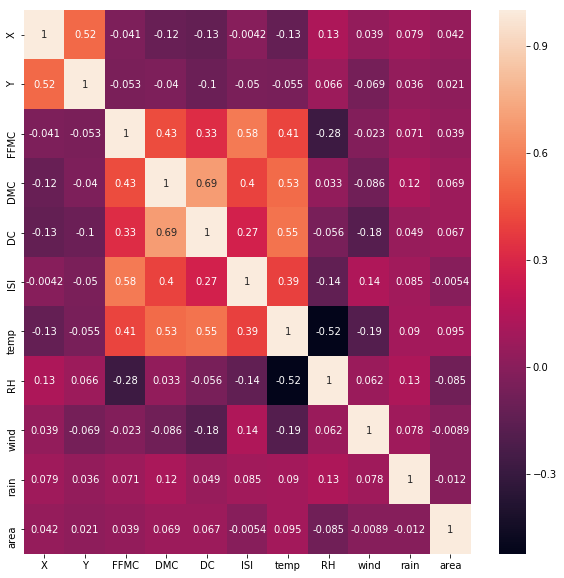

In [11]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

### Dropping values that are insignificant to the analysis that needs to be performed. Since we are trying to determine the factors that contribute to forest fire damage, we can eliminate those records that reflect no damage in area, along with the 'X' and 'Y' variables, as spatial co-ordinates cannot help determine the exact locations prone to forest fires.

In [5]:
df.drop(df[df['area'] <= 0.00].index, inplace = True) 

In [6]:
df.drop(['X','Y'],axis=1,inplace = True)

In [14]:
df.shape

(891, 11)

In [15]:
df.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,sep,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,327,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,90.942761,105.840292,555.909989,9.150954,19.045230,42.695847,4.019416,0.035017,25.764624
std,NaN,NaN,4.036541,52.542092,233.611140,4.160843,5.873818,14.729874,1.822190,0.437803,90.798664
min,NaN,NaN,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,NaN,NaN,90.200000,64.850000,513.300000,6.800000,15.900000,32.000000,2.700000,0.000000,2.470000
50%,NaN,NaN,91.600000,111.200000,661.800000,8.500000,19.400000,40.000000,4.000000,0.000000,7.190000
75%,NaN,NaN,92.900000,134.400000,699.600000,11.200000,22.900000,53.000000,4.900000,0.000000,16.800000


# Analyzing Categorical columns

### We only have two categorical variables present in our dataset, month and day

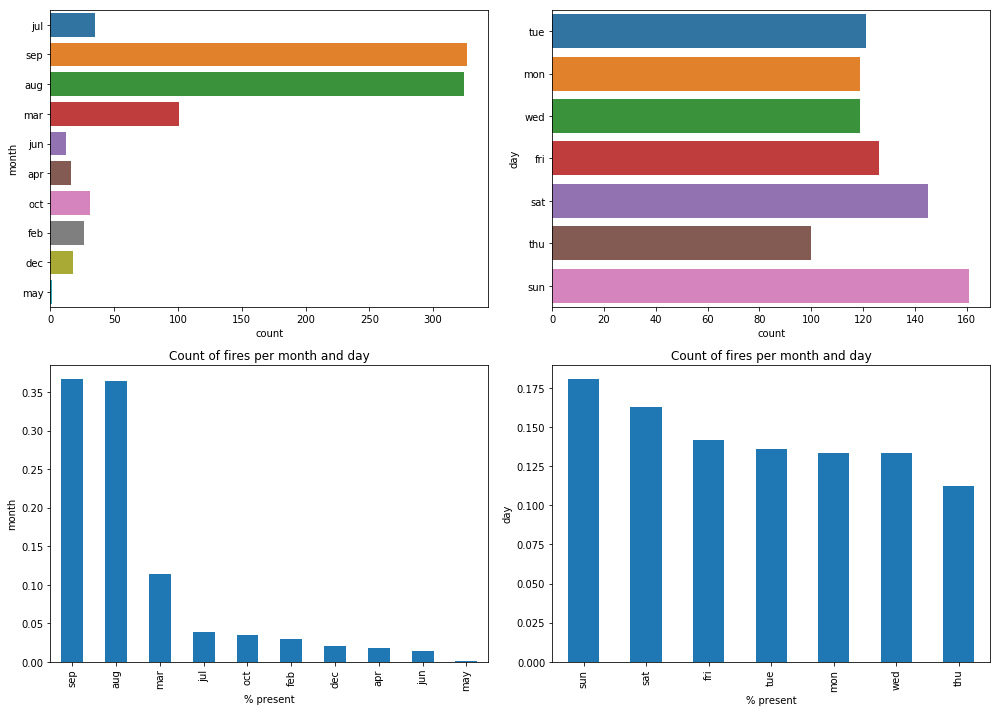

In [31]:
cat_columns= df[['month','day']]
plt.figure(figsize=(14,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% present')
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title('Count of fires per month and day')

plt.tight_layout()
plt.savefig('Month and Day.png')
plt.show()

In [17]:
a = df.groupby('month')['RH'].count()
a

month
apr     16
aug    324
dec     18
feb     26
jul     35
jun     12
mar    101
may      1
oct     31
sep    327
Name: RH, dtype: int64

### Aug and Sep had the most number of forest fires

In [18]:
b = df.groupby('day')['RH'].count()
b

day
fri    126
mon    119
sat    145
sun    161
thu    100
tue    121
wed    119
Name: RH, dtype: int64

### Sunday has most fires, Thursday has least

In [8]:
def area_cat(area):
    if area == 0.00:
        return 'no damage'
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,low
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,low
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,low
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,low
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,low


### Determining damage levels on an area per month and per day

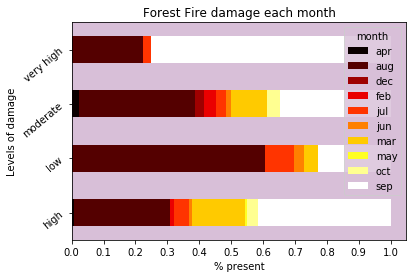

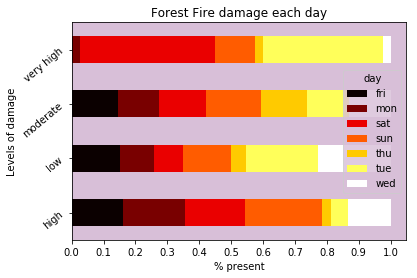

In [17]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% present')
    plt.ylabel('Levels of damage')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forest Fire damage each {}".format(col))
    plt.rcParams['axes.facecolor'] = 'thistle'

plt.savefig('Forest Fire Damage.png')
plt.show()

### Previously we had observed that August and September had the most number of forest fires. And from the above plot of month, we can understand few things:

#### 1.  Most of the fires in August were low (< 1 hectare).
#### 2. The very high damages(>100 hectares) happened in only 3 months - July, August and September.
#### 3.There aren't any significant observations on fire damage per day, but we can infer that most number of fires took place on Sundays.

### Checking temperature variation/range over months

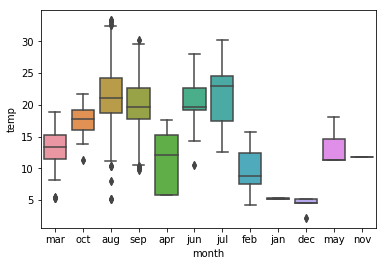

In [114]:
sns.boxplot(data=df,y='temp',x='month')

#### As expected, the months of August and September have the most variations in temperature and hence reflect most number of forest fires

# Checking for effect of climate conditions on forest fires

In [22]:
df1 = df[['wind','temp','RH','rain']]

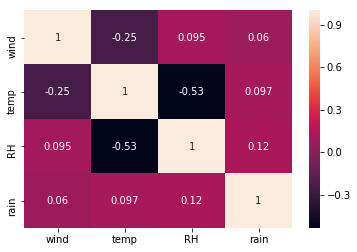

In [23]:
sns.heatmap(df1.corr(),annot=True)

### Temperature has the highest correlation with the 'RH' , a negative one, followed by wind, which is also negatively correlated

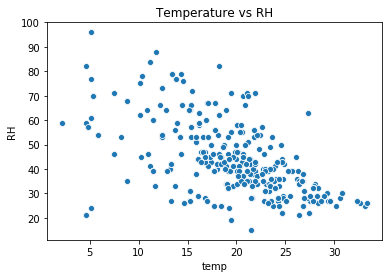

In [28]:
sns.scatterplot(df.temp,df.RH)
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Temperature vs RH')
plt.savefig('Temp vs RH.png')

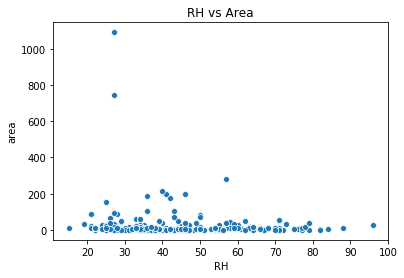

In [29]:
sns.scatterplot(df.RH,df.area)
plt.title('RH vs Area')
plt.savefig('RH vs Area.png')

### Considering RH and Temperature are negatively correlated, this plot illustrates how high temperature values(which would mean lower RH) affect greater areas, which was inferred from the heatmap plotted above

Text(0.5, 1.0, 'Temperature vs Area')

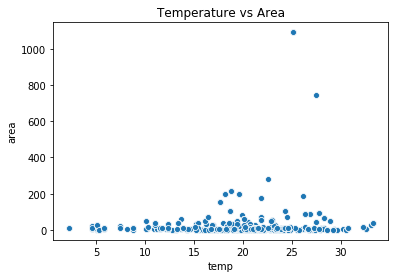

In [7]:
sns.scatterplot(x=df.temp,y=df.area)
plt.title('Temperature vs Area')

### Understanding the effect of Rain and Wind on other climate variables

#### Rain

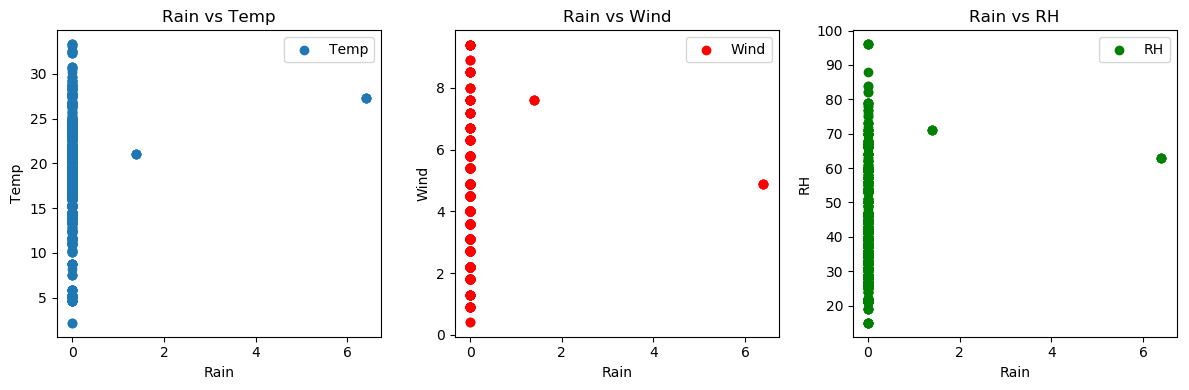

In [37]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.scatter(df['rain'], df['temp'], label='Temp')
ax2.scatter(df['rain'], df['wind'], label='Wind',color='red')
ax1.set_xlabel('Rain')
ax1.set_ylabel('Temp')
ax1.set_title('Rain vs Temp')
ax1.legend()
ax2.set_xlabel('Rain')
ax2.set_ylabel('Wind')
ax2.set_title('Rain vs Wind')
ax2.legend()
ax3.scatter(df['rain'],df['RH'],label='RH',color='green')
ax3.set_xlabel('Rain')
ax3.set_ylabel('RH')
ax3.set_title('Rain vs RH')
ax3.legend()
plt.tight_layout()
plt.show()

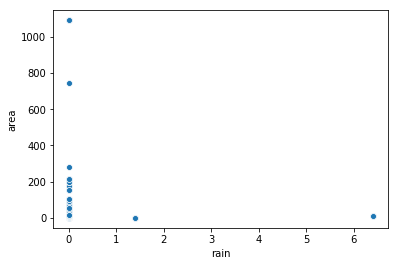

In [75]:
sns.scatterplot(data = df,x='rain',y='area')

#### Rain is not an important factor in the causal of forest fires. It is important to note that this observation pertains only to this dataset. There are several instances where higher rainfall has proven effective in bringing down forest fires

### Wind

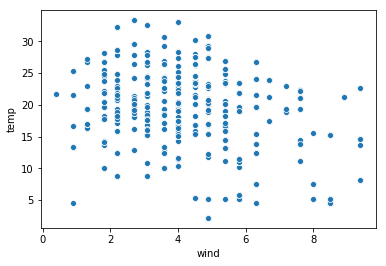

In [38]:
sns.scatterplot(df.wind,df.temp)

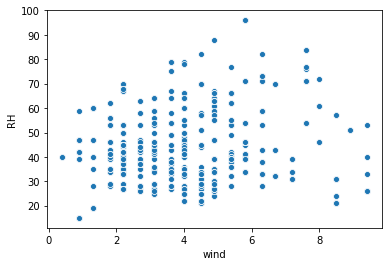

In [39]:
sns.scatterplot(df.wind,df.RH)

### There is no significant observation available from wind as a factor on its own. However, wind plays a crucial role in Fire Weather Indice levels.

# Effect of FWI

### Understanding how Fire Weather Indices correlate to one another

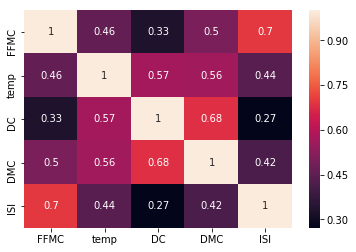

In [74]:
df2 = df[['FFMC','temp','DC','DMC','ISI']]
sns.heatmap(df2.corr(),annot=True)

#### It is evident from the heatmap that the FWI values share a strong positive correlation

## Showing values range of the FWI Indices

### FFMC - The dryness of the smallest forest fuels (surface litter, leaves, needles, small twigs, etc). 

(array([  7.,   0.,   0.,   2.,   1.,  26.,  64.,  59., 513., 219.]),
 array([63.5 , 66.77, 70.04, 73.31, 76.58, 79.85, 83.12, 86.39, 89.66,
        92.93, 96.2 ]),
 <a list of 10 Patch objects>)

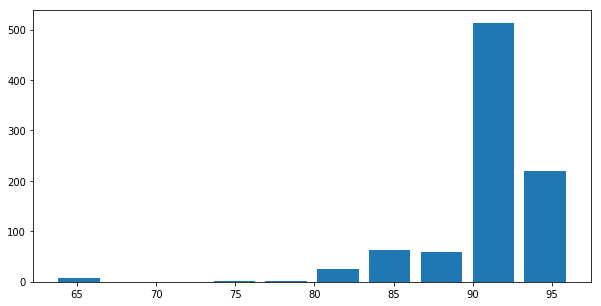

In [73]:
plt.figure(figsize=(10,5))
plt.hist(x=df.FFMC,bins=10,rwidth=0.8)

### DMC - The dryness of the medium-sized surface fuels and upland duff layers (approximately 2 to 10 cm).

(array([ 33.,  18.,  20.,  46.,  66.,  39.,   4.,  15.,  51.,  72.,  67.,
         52.,  82., 133.,  55.,  35.,  21.,  25.,  20.,   4.,   2.,   3.,
          4.,   7.,   1.,   2.,   0.,   1.,   8.,   5.]),
 array([  3.2       ,  12.80333333,  22.40666667,  32.01      ,
         41.61333333,  51.21666667,  60.82      ,  70.42333333,
         80.02666667,  89.63      ,  99.23333333, 108.83666667,
        118.44      , 128.04333333, 137.64666667, 147.25      ,
        156.85333333, 166.45666667, 176.06      , 185.66333333,
        195.26666667, 204.87      , 214.47333333, 224.07666667,
        233.68      , 243.28333333, 252.88666667, 262.49      ,
        272.09333333, 281.69666667, 291.3       ]),
 <a list of 30 Patch objects>)

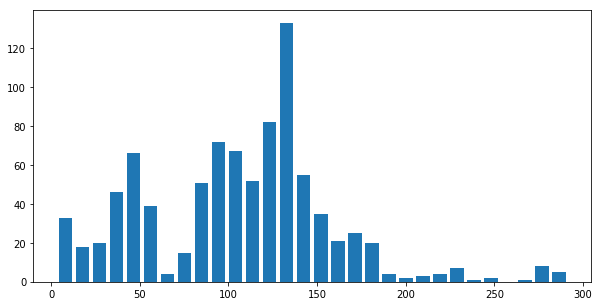

In [34]:
plt.figure(figsize=(10,5))
plt.hist(x=df.DMC,bins=30,rwidth=0.8)

### DC - The dryness of the largest surface fuels and deep duff layers (approximately 10+ cm)

(array([113.,  31.,   2.,  32.,  19.,  28., 104., 271., 245.,  46.]),
 array([ 15.3 ,  99.83, 184.36, 268.89, 353.42, 437.95, 522.48, 607.01,
        691.54, 776.07, 860.6 ]),
 <a list of 10 Patch objects>)

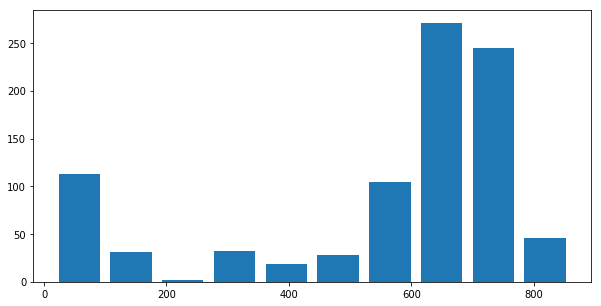

In [33]:
plt.figure(figsize=(10,5))
plt.hist(x=df.DC,bins=10,rwidth=0.8)

### ISI - The ISI combines the FFMC and wind speed to indicate the expected rate of fire spread 

(array([  7.,  24.,  24.,  29.,  15.,  18.,  24.,  74., 110.,  65.,  92.,
         68.,  63.,  43.,  22.,  27.,  32.,  25.,  33.,  16.,   8.,  12.,
         20.,  18.,   0.,   0.,  18.,   0.,   2.,   2.]),
 array([ 0.8 ,  1.53,  2.26,  2.99,  3.72,  4.45,  5.18,  5.91,  6.64,
         7.37,  8.1 ,  8.83,  9.56, 10.29, 11.02, 11.75, 12.48, 13.21,
        13.94, 14.67, 15.4 , 16.13, 16.86, 17.59, 18.32, 19.05, 19.78,
        20.51, 21.24, 21.97, 22.7 ]),
 <a list of 30 Patch objects>)

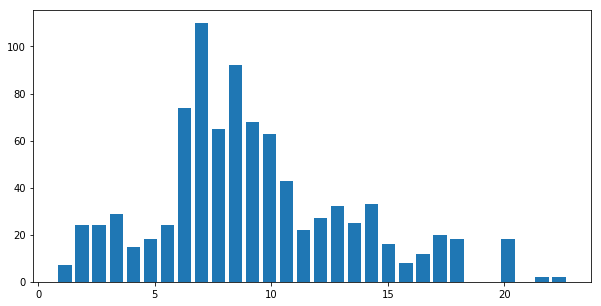

In [35]:
plt.figure(figsize=(10,5))
plt.hist(x=df.ISI,bins=30,rwidth=0.8)

### Analyzing how the FWI relates to Area and Temperature

#### Generally, fires begin to ignite at FFMC values near 76, and the maximum probable value that will ever be achieved is 96. Similarly, DMC and DC values need to be a minimum of 21 and 79 respectively. ISI, which is a relative measure of how quickly a fire can spread, needs to be atleast 1.5 for a slow spreading fire.

In [19]:
x = df[df['FFMC'] >= 76]
y = df[df['DMC'] >= 21]
z = df[df['DC'] >= 79]
a = df[df['ISI'] >= 1.5]

### Values of FWI against AREA

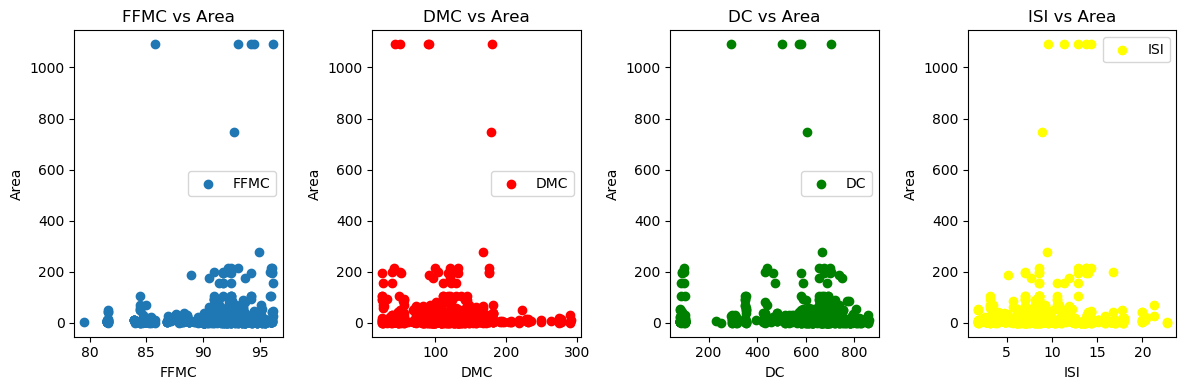

In [23]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
ax1.scatter(x['FFMC'], df['area'].head(882), label='FFMC')
ax2.scatter(y['DMC'], df['area'].head(840), label='DMC',color='red')
ax1.set_xlabel('FFMC')
ax1.set_ylabel('Area')
ax1.set_title('FFMC vs Area')
ax1.legend()
ax2.set_xlabel('DMC')
ax2.set_ylabel('Area')
ax2.set_title('DMC vs Area')
ax2.legend()
ax3.scatter(z['DC'],df['area'].head(838),label='DC',color='green')
ax3.set_xlabel('DC')
ax3.set_ylabel('Area')
ax3.set_title('DC vs Area')
ax3.legend()
ax4.scatter(a['ISI'],df['area'].head(884),label='ISI',color='yellow')
ax4.set_xlabel('ISI')
ax4.set_ylabel('Area')
ax4.set_title('ISI vs Area')
ax4.legend()
plt.tight_layout()

plt.savefig('FWI vs Area.png')
plt.show()

####  From the plots, the minimum FWI values that would set off a forest fire are evident

### Values of FWI against TEMPERATURE

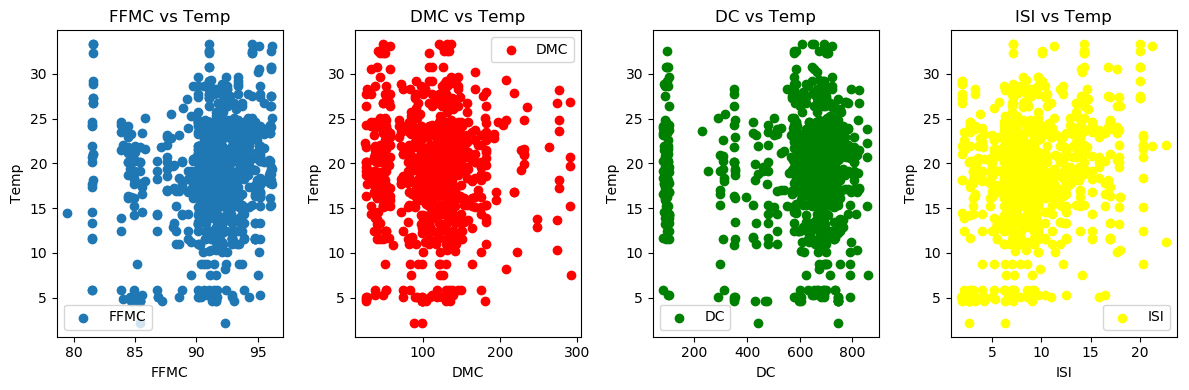

In [25]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
ax1.scatter(x['FFMC'], df['temp'].head(882), label='FFMC')
ax2.scatter(y['DMC'], df['temp'].head(840), label='DMC',color='red')
ax1.set_xlabel('FFMC')
ax1.set_ylabel('Temp')
ax1.set_title('FFMC vs Temp')
ax1.legend()
ax2.set_xlabel('DMC')
ax2.set_ylabel('Temp')
ax2.set_title('DMC vs Temp')
ax2.legend()
ax3.scatter(z['DC'],df['temp'].head(838),label='DC',color='green')
ax3.set_xlabel('DC')
ax3.set_ylabel('Temp')
ax3.set_title('DC vs Temp')
ax3.legend()
ax4.scatter(a['ISI'],df['temp'].head(884),label='ISI',color='yellow')
ax4.set_xlabel('ISI')
ax4.set_ylabel('Temp')
ax4.set_title('ISI vs Temp')
ax4.legend()
plt.tight_layout()
plt.rcParams['axes.facecolor'] = 'white'

plt.savefig('FWI vs Temperature.png')
plt.show()

### From this, we see that temperature can be a driving factor for FWI values

### From research into FWI, we know that wind speed does not have any impact on DMC and DC because of the depth of these fuel layers

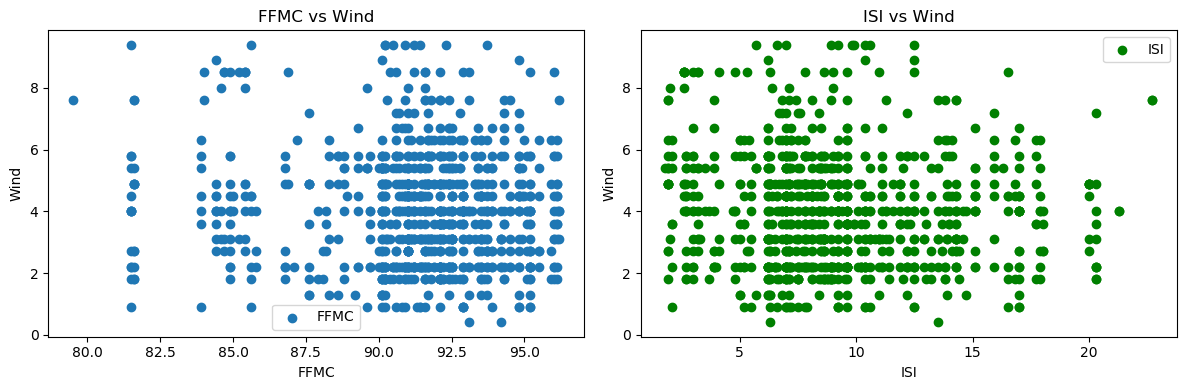

In [58]:
fig = plt.figure(figsize=(12,4),dpi=100)
plt.rcParams['axes.facecolor'] = 'white'
ax1 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax1.scatter(x['FFMC'], df['wind'].head(882), label='FFMC')
ax1.set_xlabel('FFMC')
ax1.set_ylabel('Wind')
ax1.set_title('FFMC vs Wind')
ax1.legend()
ax4.scatter(a['ISI'],df['wind'].head(884),label='ISI',color='green')
ax4.set_xlabel('ISI')
ax4.set_ylabel('Wind')
ax4.set_title('ISI vs Wind')
ax4.legend()
plt.tight_layout()

plt.show()

### ISI is a combination of FFMC and wind speed. Hence, it behaves almost like a mirror image to the FFMC index

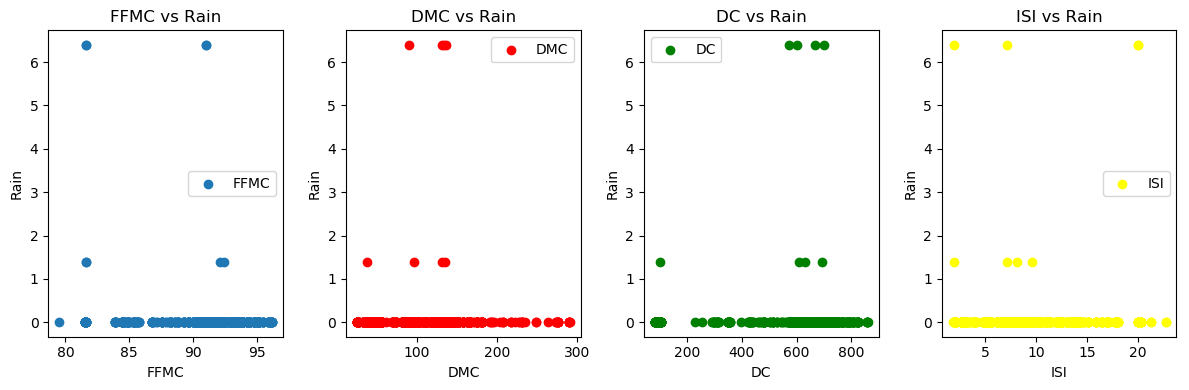

In [46]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
ax1.scatter(x['FFMC'], df['rain'].head(882), label='FFMC')
ax2.scatter(y['DMC'], df['rain'].head(840), label='DMC',color='red')
ax1.set_xlabel('FFMC')
ax1.set_ylabel('Rain')
ax1.set_title('FFMC vs Rain')
ax1.legend()
ax2.set_xlabel('DMC')
ax2.set_ylabel('Rain')
ax2.set_title('DMC vs Rain')
ax2.legend()
ax3.scatter(z['DC'],df['rain'].head(838),label='DC',color='green')
ax3.set_xlabel('DC')
ax3.set_ylabel('Rain')
ax3.set_title('DC vs Rain')
ax3.legend()
ax4.scatter(a['ISI'],df['rain'].head(884),label='ISI',color='yellow')
ax4.set_xlabel('ISI')
ax4.set_ylabel('Rain')
ax4.set_title('ISI vs Rain')
ax4.legend()
plt.tight_layout()

plt.show()

### FFMC, DMC and DC are all affected by rain. However, in this dataset, we can see no visible proof as the rain recorded has been very little.

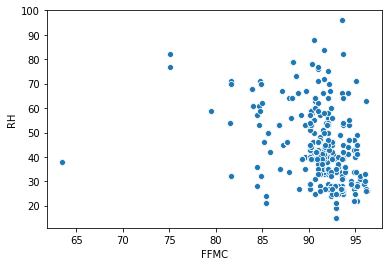

In [47]:
sns.scatterplot(data=df,x='FFMC',y='RH')

### FFMC is affected by RH. We see that most of the fires had mid-to-low RH, which would indicate high temperature and hence higher FFMC

### For complete details on FWI, you can click [here](http://www.dnr.state.mi.us/WWW/FMD/WEATHER/Reference/FWI_Background.pdf)


# Looking for change in results after dropping duplicates

In [82]:
dfdf = pd.read_csv('C:\\Users\\Dithya\\Downloads\\forestfires.csv')
dfdf.drop_duplicates(inplace=True)
dfdf.shape

(513, 13)

In [85]:
dfdf.drop(dfdf[dfdf['area'] <= 0.00].index, inplace = True)

In [86]:
dfdf.shape

(269, 14)

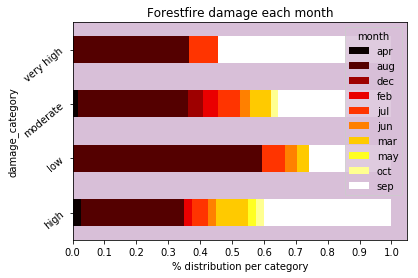

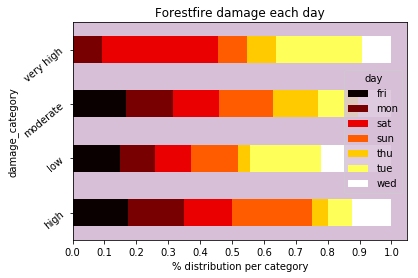

In [87]:
cat_columns= dfdf[['month','day']]
def area_cat(area):
    if area == 0.00:
        return 'no damage'
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

dfdf['damage_category'] = dfdf['area'].apply(area_cat)
dfdf.head()

for col in cat_columns:
    cross = pd.crosstab(index=dfdf['damage_category'],columns=dfdf[col],normalize='index')
    #plt.figure(figsize=(20,10),dpi=100)
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
    plt.rcParams['axes.facecolor'] = 'thistle'

plt.show()

In [92]:
x1 = dfdf[dfdf['FFMC'] >= 76]
y1 = dfdf[dfdf['DMC'] >= 21]
z1 = dfdf[dfdf['DC'] >= 79]
a1 = dfdf[dfdf['ISI'] >= 1.5]

print(x1.shape,y1.shape,z1.shape,a1.shape)

(266, 14) (252, 14) (250, 14) (268, 14)


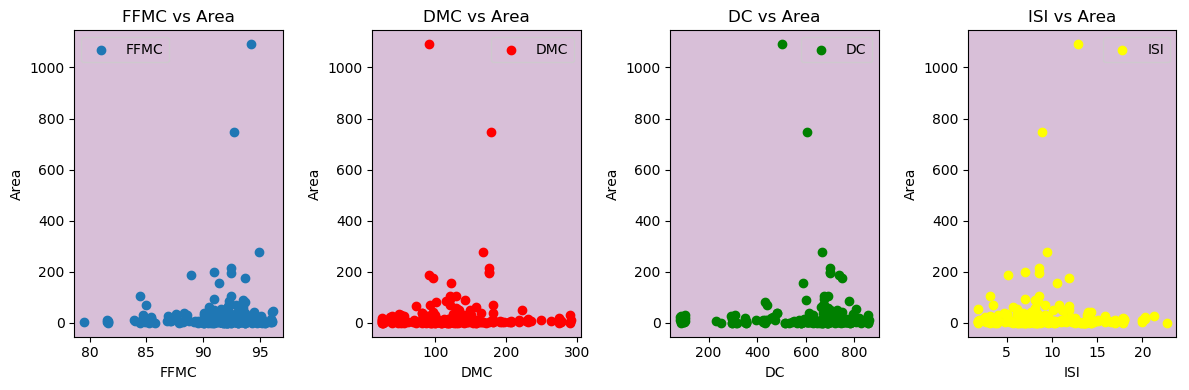

In [95]:
fig = plt.figure(figsize=(12,4),dpi=100)
ax11 = fig.add_subplot(1, 4, 1)
ax21 = fig.add_subplot(1, 4, 2)
ax31 = fig.add_subplot(1, 4, 3)
ax41 = fig.add_subplot(1, 4, 4)
ax11.scatter(x1['FFMC'], dfdf['area'].head(266), label='FFMC')
ax21.scatter(y1['DMC'], dfdf['area'].head(252), label='DMC',color='red')
ax11.set_xlabel('FFMC')
ax11.set_ylabel('Area')
ax11.set_title('FFMC vs Area')
ax11.legend()
ax21.set_xlabel('DMC')
ax21.set_ylabel('Area')
ax21.set_title('DMC vs Area')
ax21.legend()
ax31.scatter(z1['DC'],dfdf['area'].head(250),label='DC',color='green')
ax31.set_xlabel('DC')
ax31.set_ylabel('Area')
ax31.set_title('DC vs Area')
ax31.legend()
ax41.scatter(a1['ISI'],dfdf['area'].head(268),label='ISI',color='yellow')
ax41.set_xlabel('ISI')
ax41.set_ylabel('Area')
ax41.set_title('ISI vs Area')
ax41.legend()
plt.tight_layout()
plt.rcParams['axes.facecolor'] = 'white'

plt.show()

### No significant change observed in output

## Results and Conclusions from Analysis

### 1. The most number of fires occurred in the months of August and September, specifically over the weekend. It could be possible that, considering these are Summer-Fall months, due to human activities in the area, like hiking or camping, they could be inadvertently causing a fire.

### 2. Temperature and RH play a huge role in the amount of area that is affected by forest fires. Rain, surprisingly, has no effect on the area limit. While it should have been one of the important factors, it certainly has no role in this data.

### 3. Wind alone is not enough to be a factor in causing/spreading forest fires. However, when combined with FWI values, it has a huge impact on the same and the area affected as well.

### 4. Even with extreme FWI values and high temperatures, there are several instances where the area affected has been zero. This could be because of prompt action on part of the Forest and Wildlife Department.

## <center> ---- THANK YOU ---- </center>